In [38]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [93]:
data = load_wine()
data_array = data.data
target = data.target
data_array_small = data_array[:13]

In [94]:
values,vectors = LA.eig(data_array_small)
values_matrix = np.diag(values)
recon = vectors.dot(values_matrix).dot(LA.inv(vectors))
print(np.around(recon - data_array_small,2).sum() == 0)

True


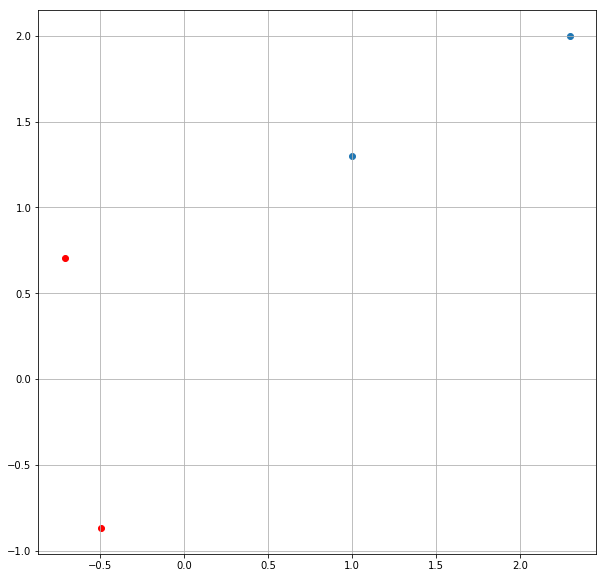

In [95]:
data_point_1 = np.array([1,1.3])
data_point_2 = np.array([2.3,2])
fake_data = np.vstack((data_point_1,data_point_2))
values,vectors = LA.eig(fake_data)
plt.figure(figsize=(10, 10))
plt.scatter(fake_data[:,0],fake_data[:,1])
vectors_show = vectors.T
plt.scatter(vectors_show[:,0],vectors_show[:,1],c='red')
plt.grid()
plt.show()

In [88]:
print(values)
print(vectors)

[-0.3  3.3]
[[-0.70710678 -0.49205726]
 [ 0.70710678 -0.87056284]]


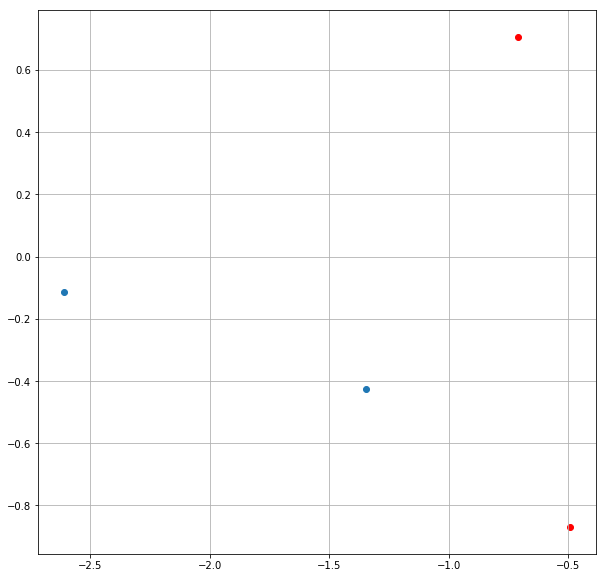

In [98]:
new_base_1 = vectors[:,0]
new_base_2 = vectors[:,1]
bassis_change_mat = vectors.T
changed_bases = []
for xx in fake_data:
    changed_result = xx.dot(bassis_change_mat)
    changed_bases.append(changed_result)
changed_bases = np.asarray(changed_bases)
plt.figure(figsize=(10, 10))
plt.grid()
vectors_show = vectors.T
plt.scatter(vectors_show[:,0],vectors_show[:,1],c='red')
plt.scatter(changed_bases[:,0],changed_bases[:,1])
plt.show()

In [107]:
import pandas as pd
import seaborn as sns
data = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


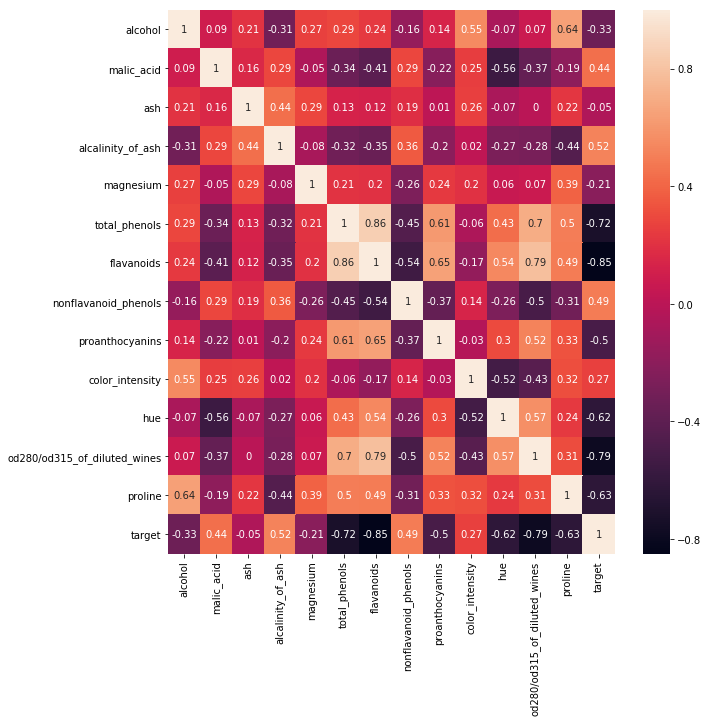

In [110]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.around(df.corr(),2),annot=True)
plt.show()

In [111]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

    flavanoids  od280/od315_of_diluted_wines
0         3.06                          3.92
1         2.76                          3.40
2         3.24                          3.17
3         3.49                          3.45
4         2.69                          2.93
5         3.39                          2.85
6         2.52                          3.58
7         2.51                          3.58
8         2.98                          2.85
9         3.15                          3.55
10        3.32                          3.17
11        2.43                          2.82
12        2.76                          2.90
13        3.69                          2.73
14        3.64                          3.00
15        2.91                          2.88
16        3.14                          2.65
17        3.40                          2.57
18        3.93                          2.82
19        3.03                          3.36
(178, 2)
(178,)


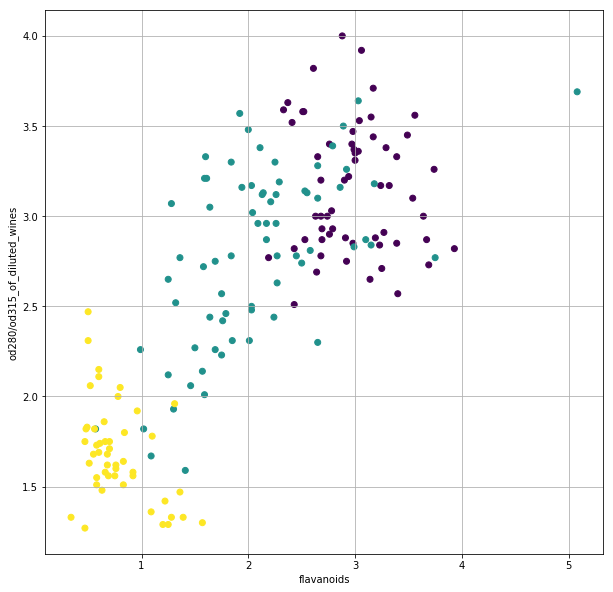

In [139]:
data_three = df[['flavanoids','od280/od315_of_diluted_wines']]
print(data_three.head(20))
data_main = data_three.values
data_color = df.target.values
print(data_main.shape)
print(data_color.shape)
plt.figure(figsize=(10, 10))
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.grid()
plt.show()

In [152]:
data_mean = data_main.mean(axis=0)
data_std = np.sqrt(((data_main-data_mean)**2).sum()/(len(data_main)-1))
data_var = data_std ** 2
print("Mean : ", data_mean)
print("STD : ",data_std)
print("Var : ", data_var)

Mean :  [2.02926966 2.61168539]
STD :  1.2254815712901455
Var :  1.5018050815717638


(178, 2)
[[3.06 3.92]
 [2.76 3.4 ]
 [3.24 3.17]]
(178, 2)
[[1.03073034 1.30831461]
 [0.73073034 0.78831461]
 [1.21073034 0.55831461]]


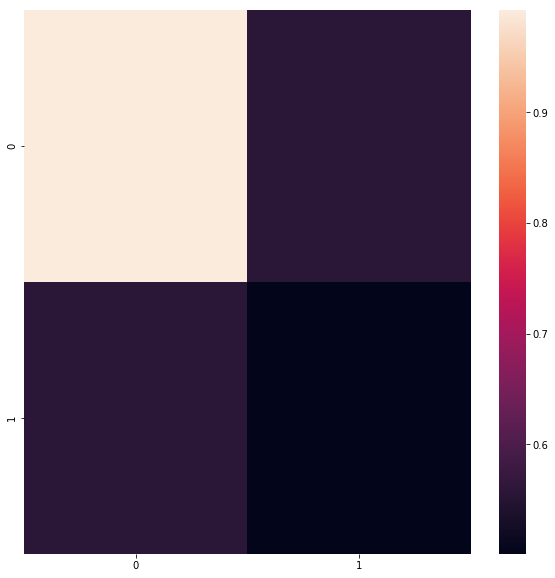

[[0.99211351 0.55512595]
 [0.55512595 0.50125446]]


In [169]:
print(data_main.shape)
print(data_main[:3])
center_matrix  = data_main - data_mean
print(center_matrix.shape)
print(center_matrix[:3])
covarience = (1/ len(center_matrix)) * center_matrix.T.dot(center_matrix) 
plt.figure(figsize=(10,10))
sns.heatmap(covarience)
plt.show()
print(covarience)

          0         1
0  0.997719  0.558262
1  0.558262  0.504086


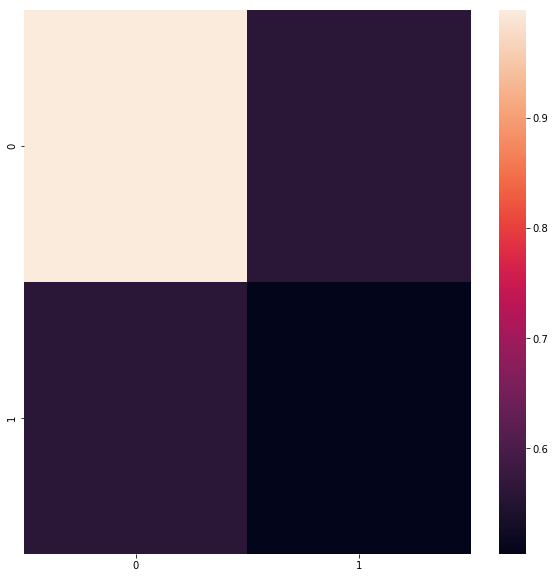

In [170]:
# compare with built in 
data_main_df = pd.DataFrame(data_main)
print(data_main_df.cov())
plt.figure(figsize=(10,10))
sns.heatmap(data_main_df.cov())
plt.show()

Value:  [1.35364401 0.13972396]
Vector :  [[ 0.8379614 -0.5457295]
 [ 0.5457295  0.8379614]]
Data Min Value:  0.34
Data Max Value:  5.08


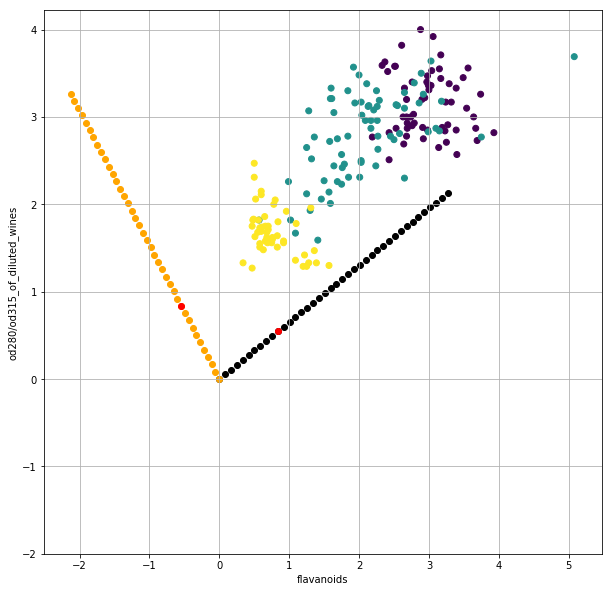

In [230]:
e_valaue,e_vector = np.linalg.eig(covarience)

e_vector_1 =  e_vector[:,0]
e_vector_2 =  e_vector[:,1]
e_vector_plot = np.vstack((e_vector_1.T,e_vector_2.T))
print("Value: ",e_valaue)
print("Vector : ",e_vector)

data_min_value = data_main.min()
data_max_value = data_main.max()
print('Data Min Value: ',data_min_value)
print('Data Max Value: ',data_max_value)
e_vector = e_vector
created_range = np.expand_dims(np.arange(0,4,0.1),1)
created_vector1 = e_vector_1 * created_range
created_vector2 = e_vector_2 * created_range

# created_range = range(data_min_value,data_max_value,50)
plt.figure(figsize=(10, 10))
plt.scatter(created_vector1[:,0],created_vector1[:,1],c='black')
plt.scatter(created_vector2[:,0],created_vector2[:,1],c='orange')
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.scatter(e_vector_plot[:,0],e_vector_plot[:,1],c='red')
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.ylim(-2)
plt.grid()
plt.show()

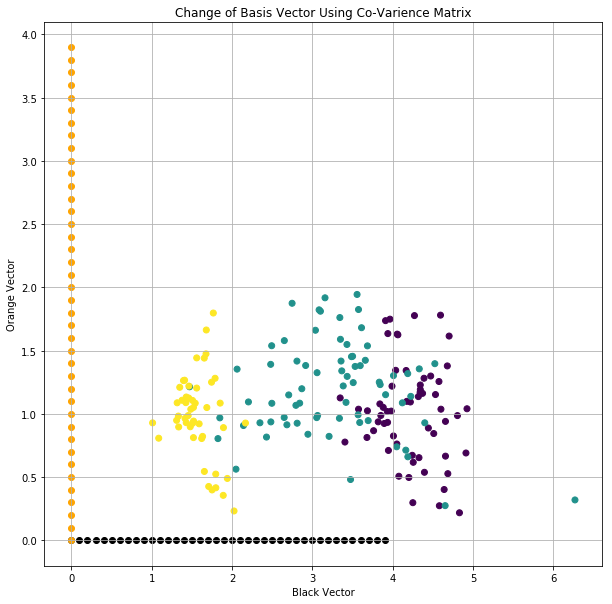

In [241]:
new_base_1 = e_vector_1
new_base_2 = e_vector_2
bassis_change_mat = np.vstack((new_base_1,new_base_2)).T
changed_bases = []
for xx in data_main:
    changed_result = xx.dot(bassis_change_mat)
    changed_bases.append(changed_result)
changed_bases = np.asarray(changed_bases)

range_one_change = []
for xx in created_vector1:
    changed_result = xx.dot(bassis_change_mat)
    range_one_change.append(changed_result)
range_one_change = np.asarray(range_one_change)

range_two_change = []
for xx in created_vector2:
    changed_result = xx.dot(bassis_change_mat)
    range_two_change.append(changed_result)
range_two_change = np.asarray(range_two_change)
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Change of Basis Vector Using Co-Varience Matrix')
plt.scatter(range_one_change[:,0],range_one_change[:,1],c='black')
plt.scatter(range_two_change[:,0],range_two_change[:,1],c='orange')
plt.scatter(changed_bases[:,0],changed_bases[:,1],c=data_color)
plt.xlabel('Black Vector')
plt.ylabel('Orange Vector')
plt.show()

In [242]:
print('---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------


    flavanoids  od280/od315_of_diluted_wines
0         3.06                          3.92
1         2.76                          3.40
2         3.24                          3.17
3         3.49                          3.45
4         2.69                          2.93
5         3.39                          2.85
6         2.52                          3.58
7         2.51                          3.58
8         2.98                          2.85
9         3.15                          3.55
10        3.32                          3.17
11        2.43                          2.82
12        2.76                          2.90
13        3.69                          2.73
14        3.64                          3.00
15        2.91                          2.88
16        3.14                          2.65
17        3.40                          2.57
18        3.93                          2.82
19        3.03                          3.36
(178, 2)
(178,)


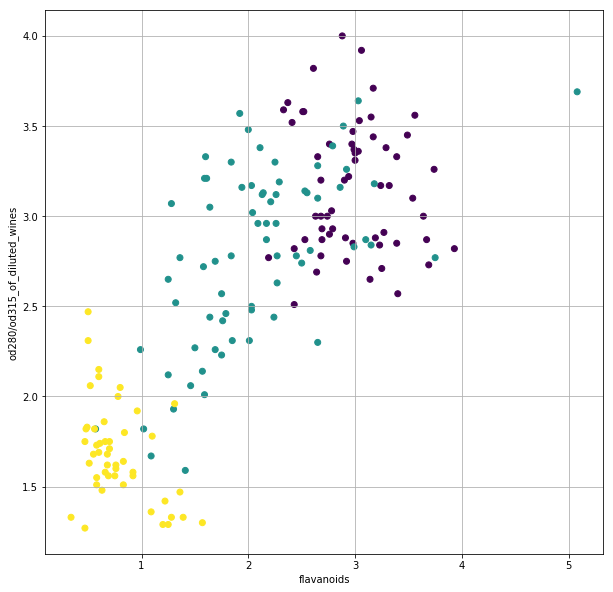

In [243]:
data_three = df[['flavanoids','od280/od315_of_diluted_wines']]
print(data_three.head(20))
data_main = data_three.values
data_color = df.target.values
print(data_main.shape)
print(data_color.shape)
plt.figure(figsize=(10, 10))
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.grid()
plt.show()

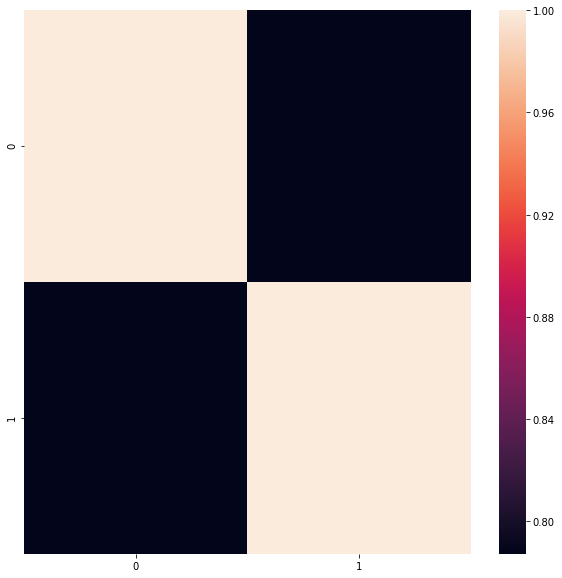

[[1.        0.7871939]
 [0.7871939 1.       ]]


In [246]:
data_mean = data_main.mean(0)
data_std =  data_main.std(0)
center_matrix  = (data_main - data_mean)/data_std
Correlation = (1/ len(center_matrix)) * center_matrix.T.dot(center_matrix) 
plt.figure(figsize=(10,10))
sns.heatmap(Correlation)
plt.show()
print(Correlation)

          0         1
0  1.000000  0.787194
1  0.787194  1.000000


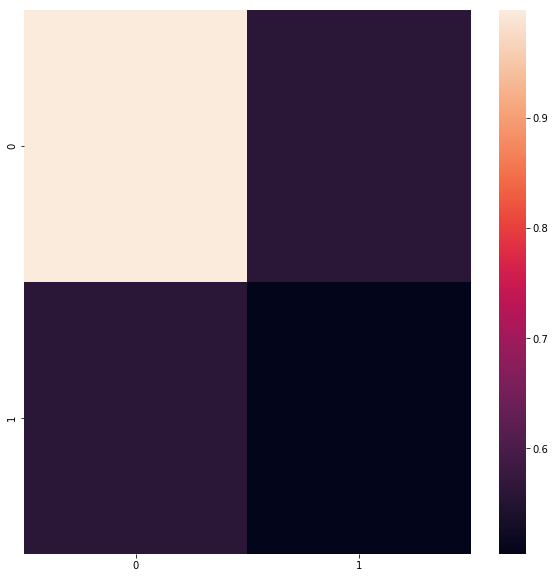

In [248]:
# compare with built in 
data_main_df = pd.DataFrame(data_main)
print(data_main_df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(data_main_df.cov())
plt.show()

Value:  [1.7871939 0.2128061]
Vector :  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Data Min Value:  0.34
Data Max Value:  5.08


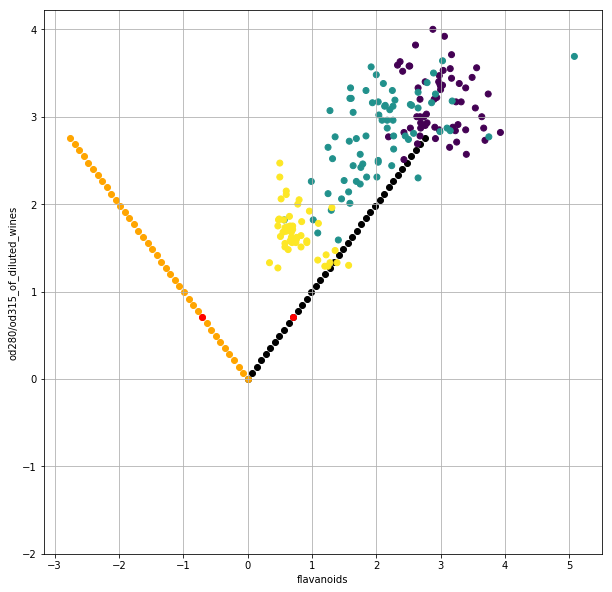

In [249]:
e_valaue,e_vector = np.linalg.eig(Correlation)

e_vector_1 =  e_vector[:,0]
e_vector_2 =  e_vector[:,1]
e_vector_plot = np.vstack((e_vector_1.T,e_vector_2.T))
print("Value: ",e_valaue)
print("Vector : ",e_vector)

data_min_value = data_main.min()
data_max_value = data_main.max()
print('Data Min Value: ',data_min_value)
print('Data Max Value: ',data_max_value)
e_vector = e_vector
created_range = np.expand_dims(np.arange(0,4,0.1),1)
created_vector1 = e_vector_1 * created_range
created_vector2 = e_vector_2 * created_range

# created_range = range(data_min_value,data_max_value,50)
plt.figure(figsize=(10, 10))
plt.scatter(created_vector1[:,0],created_vector1[:,1],c='black')
plt.scatter(created_vector2[:,0],created_vector2[:,1],c='orange')
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.scatter(e_vector_plot[:,0],e_vector_plot[:,1],c='red')
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.ylim(-2)
plt.grid()
plt.show()

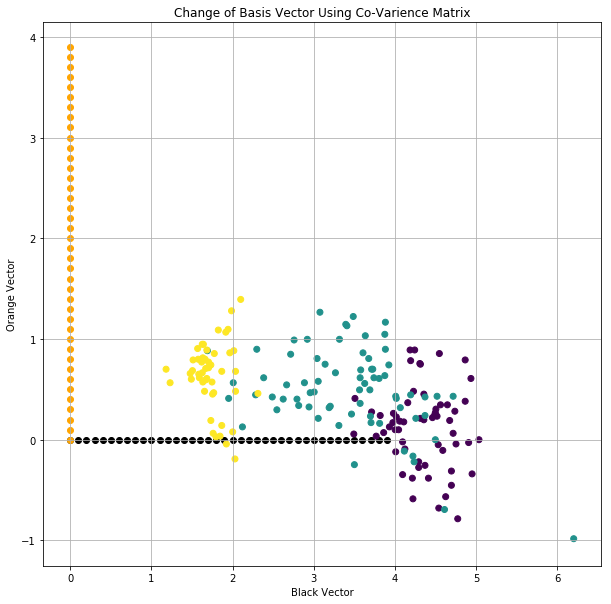

In [250]:
new_base_1 = e_vector_1
new_base_2 = e_vector_2
bassis_change_mat = np.vstack((new_base_1,new_base_2)).T
changed_bases = []
for xx in data_main:
    changed_result = xx.dot(bassis_change_mat)
    changed_bases.append(changed_result)
changed_bases = np.asarray(changed_bases)

range_one_change = []
for xx in created_vector1:
    changed_result = xx.dot(bassis_change_mat)
    range_one_change.append(changed_result)
range_one_change = np.asarray(range_one_change)

range_two_change = []
for xx in created_vector2:
    changed_result = xx.dot(bassis_change_mat)
    range_two_change.append(changed_result)
range_two_change = np.asarray(range_two_change)
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Change of Basis Vector Using Correlation Matrix')
plt.scatter(range_one_change[:,0],range_one_change[:,1],c='black')
plt.scatter(range_two_change[:,0],range_two_change[:,1],c='orange')
plt.scatter(changed_bases[:,0],changed_bases[:,1],c=data_color)
plt.xlabel('Black Vector')
plt.ylabel('Orange Vector')
plt.show()

In [251]:
print('---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------


    flavanoids  od280/od315_of_diluted_wines
0         3.06                          3.92
1         2.76                          3.40
2         3.24                          3.17
3         3.49                          3.45
4         2.69                          2.93
5         3.39                          2.85
6         2.52                          3.58
7         2.51                          3.58
8         2.98                          2.85
9         3.15                          3.55
10        3.32                          3.17
11        2.43                          2.82
12        2.76                          2.90
13        3.69                          2.73
14        3.64                          3.00
15        2.91                          2.88
16        3.14                          2.65
17        3.40                          2.57
18        3.93                          2.82
19        3.03                          3.36
(178, 2)
(178,)


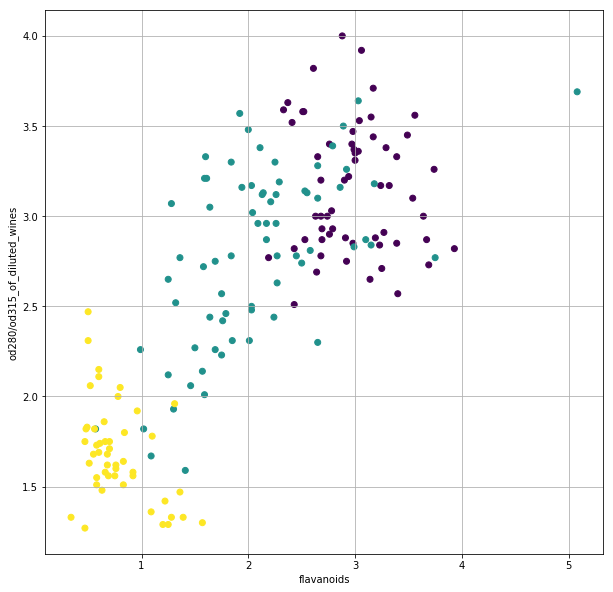

In [252]:
data_three = df[['flavanoids','od280/od315_of_diluted_wines']]
print(data_three.head(20))
data_main = data_three.values
data_color = df.target.values
print(data_main.shape)
print(data_color.shape)
plt.figure(figsize=(10, 10))
plt.scatter(data_main[:,0],data_main[:,1],c=data_color)
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.grid()
plt.show()

In [259]:
A = data_main
A_T = A.T.dot(A)
print(A_T.shape)
e_valaue,e_vector = np.linalg.eig(A_T)
idx = e_valaue.argsort()[::-1]   
e_valaue = e_valaue[idx]
e_vector = e_vector[:,idx]
e_vector_1 =  e_vector[:,0]
e_vector_2 =  e_vector[:,1]
e_vector_plot = np.vstack((e_vector_1.T,e_vector_2.T))
print("Value: ",e_valaue)
print("Vector : ",e_vector)

(2, 2)
Value:  [2167.07843716   45.85386284]
Vector :  [[-0.63811197 -0.76994358]
 [-0.76994358  0.63811197]]


In [264]:
# calculate the singular values
S = np.diag(np.sqrt(e_valaue))
U = A.dot(e_vector.dot(LA.inv(S)))

In [274]:
# Are they different from one another? 
print(sum(np.around(U.dot(S.dot(e_vector.T))-data_main,1).sum()))

0.0


In [281]:
Reduced_S = S.copy()
Reduced_S[1,1] = 0
print(U.shape)
print(Reduced_S.shape)
print(e_vector.T.shape)

(178, 2)
(2, 2)
(2, 2)


In [282]:
# Are they different from one another? 
print(sum(np.around(U.dot(Reduced_S.dot(e_vector.T))-data_main,1).sum()))

2.0999999999999996


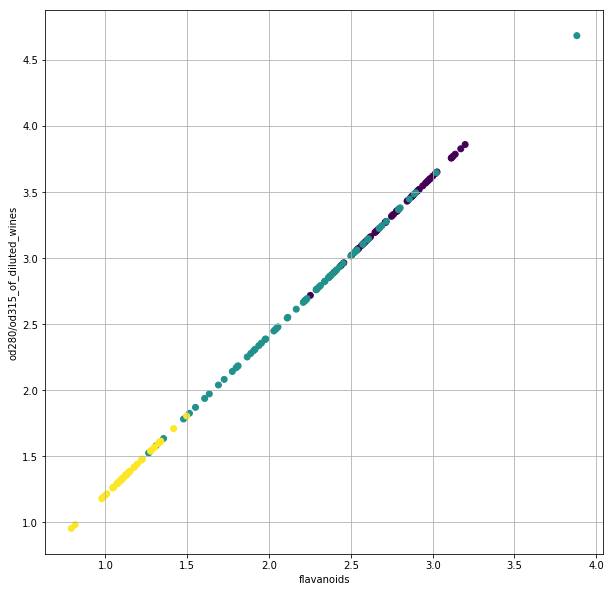

In [292]:
Reduced_data = U.dot(Reduced_S.dot(e_vector.T)).values
plt.figure(figsize=(10, 10))
plt.scatter(Reduced_data[:,0],Reduced_data[:,1],c=data_color)
plt.xlabel('flavanoids')
plt.ylabel('od280/od315_of_diluted_wines')
plt.grid()
plt.show()

In [293]:
print('---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------


   flavanoids  od280/od315_of_diluted_wines  alcalinity_of_ash
0        3.06                          3.92               15.6
1        2.76                          3.40               11.2
2        3.24                          3.17               18.6
3        3.49                          3.45               16.8
4        2.69                          2.93               21.0
5        3.39                          2.85               15.2
6        2.52                          3.58               14.6
7        2.51                          3.58               17.6
8        2.98                          2.85               14.0
9        3.15                          3.55               16.0
(178, 3)
(178,)


<IPython.core.display.Javascript object>


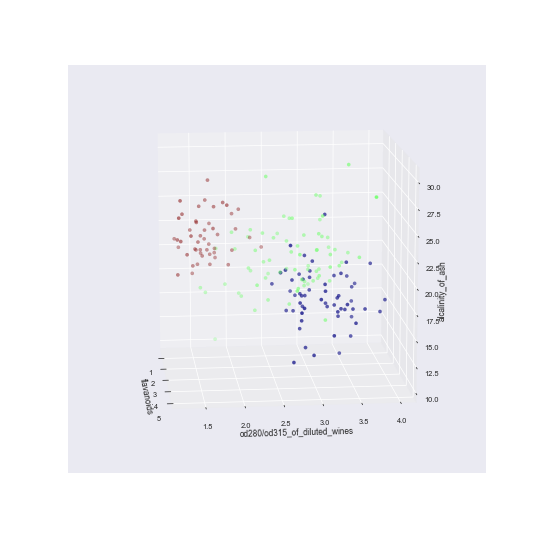

In [321]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
%matplotlib notebook
data_three = df[['flavanoids','od280/od315_of_diluted_wines','alcalinity_of_ash']]
print(data_three.head(10))
data_main = data_three.values
data_color = df.target.values
print(data_main.shape)
print(data_color.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_main[:,0], data_main[:,1], data_main[:,2], c=data_color,cmap='jet')
ax.set_xlabel('flavanoids')
ax.set_ylabel('od280/od315_of_diluted_wines')
ax.set_zlabel('alcalinity_of_ash')
plt.grid()
plt.show()

In [304]:
data_mean = data_main.mean(axis=0)
data_std = np.sqrt(((data_main-data_mean)**2).sum()/(len(data_main)-1))
data_var = data_std ** 2
print("Mean : ", data_mean)
print("STD : ",data_std)
print("Var : ", data_var)

Mean :  [ 2.02926966  2.61168539 19.49494382]
STD :  3.5573151725128116
Var :  12.654491236589855


(178, 3)
[[ 3.06  3.92 15.6 ]
 [ 2.76  3.4  11.2 ]
 [ 3.24  3.17 18.6 ]]
(178, 3)
[[ 1.03073034  1.30831461 -3.89494382]
 [ 0.73073034  0.78831461 -8.29494382]
 [ 1.21073034  0.55831461 -0.89494382]]


<IPython.core.display.Javascript object>


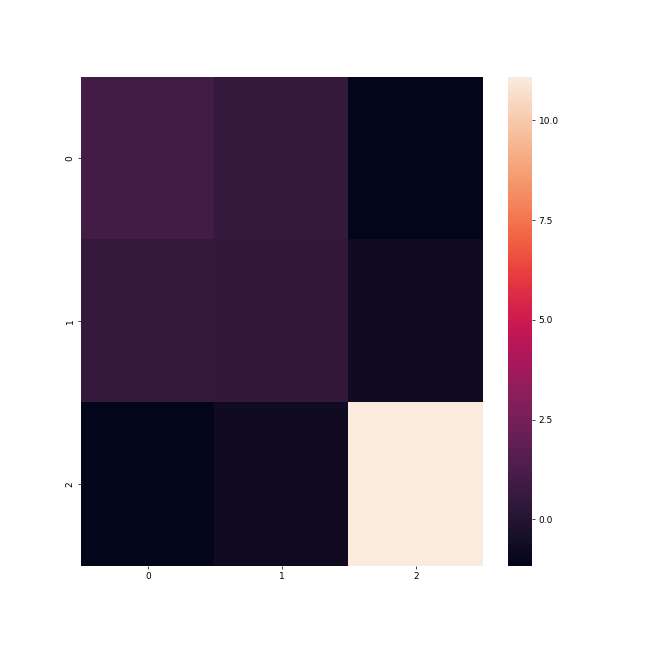

[[ 0.99211351  0.55512595 -1.16549807]
 [ 0.55512595  0.50125446 -0.65254766]
 [-1.16549807 -0.65254766 11.09003061]]


In [305]:
print(data_main.shape)
print(data_main[:3])
center_matrix  = data_main - data_mean
print(center_matrix.shape)
print(center_matrix[:3])
covarience = (1/ len(center_matrix)) * center_matrix.T.dot(center_matrix) 
plt.figure(figsize=(10,10))
sns.heatmap(covarience)
plt.show()
print(covarience)

          0         1          2
0  0.997719  0.558262  -1.172083
1  0.558262  0.504086  -0.656234
2 -1.172083 -0.656234  11.152686


<IPython.core.display.Javascript object>


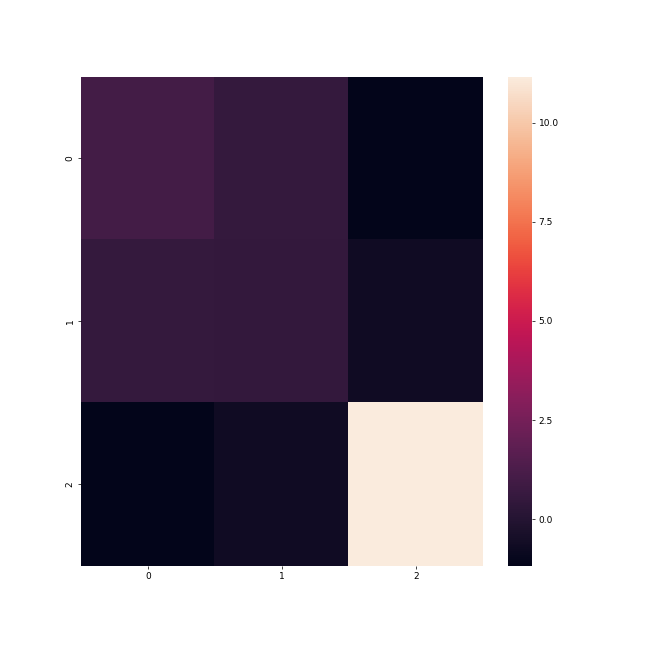

In [306]:
# compare with built in 
data_main_df = pd.DataFrame(data_main)
print(data_main_df.cov())
plt.figure(figsize=(10,10))
sns.heatmap(data_main_df.cov())
plt.show()

Value:  [11.26987076  1.17464308  0.13888475]
Vector :  [[-0.11595252 -0.82418613 -0.55432142]
 [-0.06603266 -0.55045467  0.83224957]
 [ 0.99105736 -0.13310476 -0.0094034 ]]


<IPython.core.display.Javascript object>


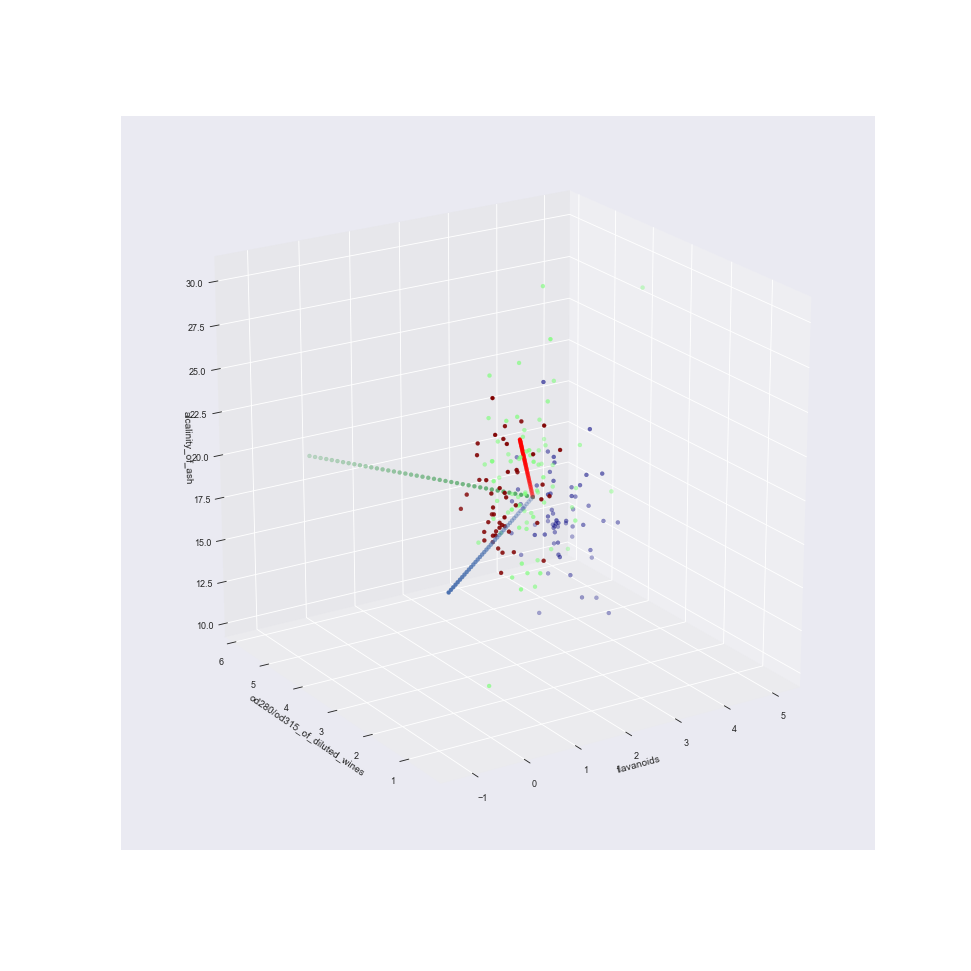

In [348]:
e_valaue,e_vector = np.linalg.eig(covarience)

e_vector_1 =  e_vector[:,0]
e_vector_2 =  e_vector[:,1]
e_vector_3 =  e_vector[:,2]

e_vector_plot = np.vstack((e_vector_1.T,e_vector_2.T,e_vector_3.T))
print("Value: ",e_valaue)
print("Vector : ",e_vector)
e_vector = e_vector
created_range = np.expand_dims(np.arange(0,4,0.1),1)
created_vector1 = e_vector_1 * created_range + data_mean
created_vector2 = e_vector_2 * created_range + data_mean
created_vector3 = e_vector_3 * created_range + data_mean

# created_range = range(data_min_value,data_max_value,50)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(created_vector1[:,0], created_vector1[:,1], created_vector1[:,2], c='red')
ax.scatter(created_vector2[:,0], created_vector2[:,1], created_vector2[:,2], cmap='blue')
ax.scatter(created_vector3[:,0], created_vector3[:,1], created_vector3[:,2], cmap='green')
ax.scatter(data_main[:,0], data_main[:,1], data_main[:,2], c=data_color,cmap='jet')
ax.set_xlabel('flavanoids')
ax.set_ylabel('od280/od315_of_diluted_wines')
ax.set_zlabel('alcalinity_of_ash')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


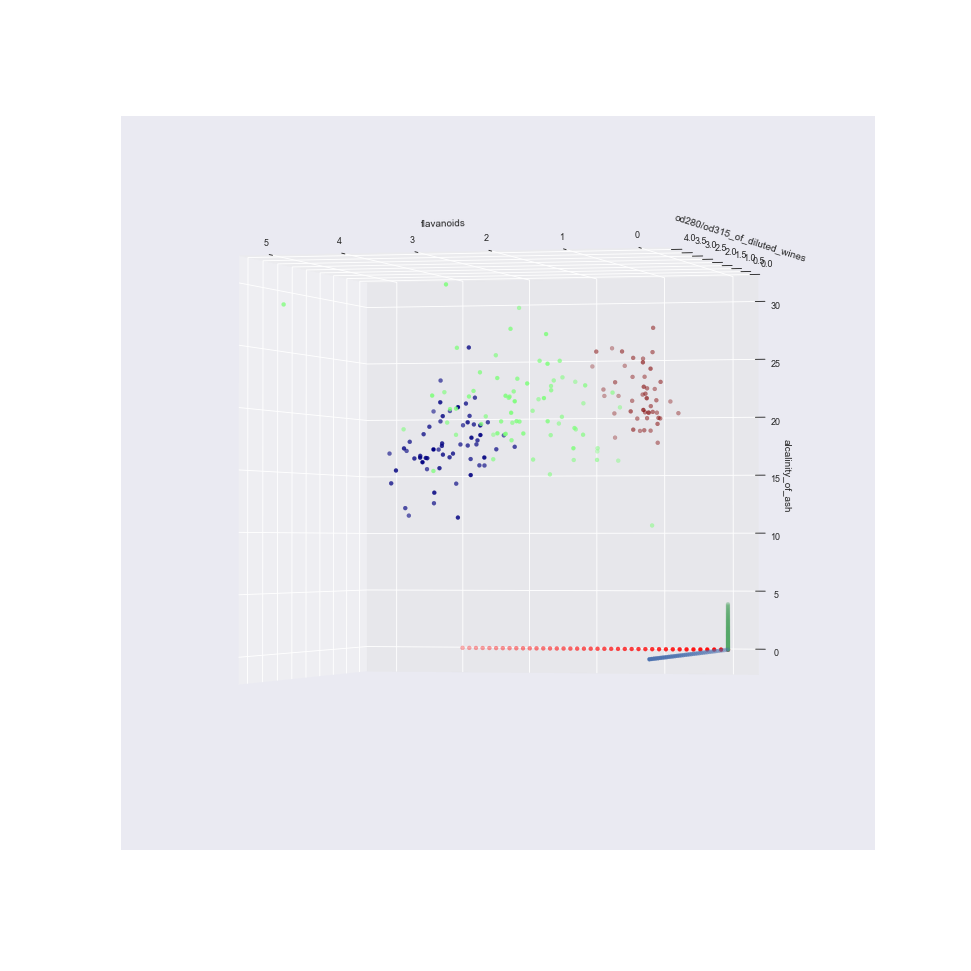

In [349]:
new_base_1 = e_vector_1
new_base_2 = e_vector_2
new_base_3 = e_vector_3

bassis_change_mat = np.vstack((new_base_1,new_base_2,new_base_3)).T
changed_bases = []
for xx in data_main:
    changed_result = xx.dot(bassis_change_mat)
    changed_bases.append(changed_result)
changed_bases = np.asarray(changed_bases)

created_vector1 = created_vector1 - data_mean
created_vector2 = created_vector2 - data_mean
created_vector3 = created_vector3 - data_mean
changed_bases_mean = changed_bases.mean()

range_one_change = []
for xx in created_vector1:
    changed_result = xx.dot(bassis_change_mat)
    range_one_change.append(changed_result)
range_one_change = np.asarray(range_one_change) 

range_two_change = []
for xx in created_vector2:
    changed_result = xx.dot(bassis_change_mat)
    range_two_change.append(changed_result)
range_two_change = np.asarray(range_two_change) 

range_three_change = []
for xx in created_vector3:
    changed_result = xx.dot(bassis_change_mat)
    range_three_change.append(changed_result)
range_three_change = np.asarray(range_three_change) 

# created_range = range(data_min_value,data_max_value,50)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(range_one_change[:,0], range_one_change[:,1], range_one_change[:,2], c='red')
ax.scatter(range_two_change[:,0], range_two_change[:,1], range_two_change[:,2], cmap='blue')
ax.scatter(range_three_change[:,0], range_three_change[:,1], range_three_change[:,2], cmap='green')
ax.scatter(data_main[:,0], data_main[:,1], data_main[:,2], c=data_color,cmap='jet')
ax.set_xlabel('flavanoids')
ax.set_ylabel('od280/od315_of_diluted_wines')
ax.set_zlabel('alcalinity_of_ash')
plt.grid()
plt.show()

In [350]:
A = data_main
A_T = A.T.dot(A)
print(A_T.shape)
e_valaue,e_vector = np.linalg.eig(A_T)
idx = e_valaue.argsort()[::-1]   
e_valaue = e_valaue[idx]
e_vector = e_vector[:,idx]
e_vector_1 =  e_vector[:,0]
e_vector_2 =  e_vector[:,1]
e_vector_3 =  e_vector[:,2]

e_vector_plot = np.vstack((e_vector_1.T,e_vector_2.T,e_vector_3.T))
print("Value: ",e_valaue)
print("Vector : ",e_vector)

(3, 3)
Value:  [7.14527338e+04 3.56854465e+02 2.67740310e+01]
Vector :  [[-0.09750837 -0.78558114  0.61102732]
 [-0.12733488 -0.59905953 -0.79051471]
 [-0.98705519  0.15488689  0.04161857]]


In [353]:
# calculate the singular values
S = np.diag(np.sqrt(e_valaue))
U = A.dot(e_vector.dot(LA.inv(S)))

In [357]:
# Are they different from one another? 
print(np.around(U.dot(S.dot(e_vector.T))-data_main,1).sum())

0.0


In [363]:
Reduced_S = S.copy()
Reduced_S[2,2] = 0
print(U.shape)
print(Reduced_S.shape)
print(e_vector.T.shape)

(178, 3)
(3, 3)
(3, 3)


In [364]:
# Are they different from one another? 
print(np.around(U.dot(Reduced_S.dot(e_vector.T))-data_main,1).sum())

-0.6999999999999997


<IPython.core.display.Javascript object>


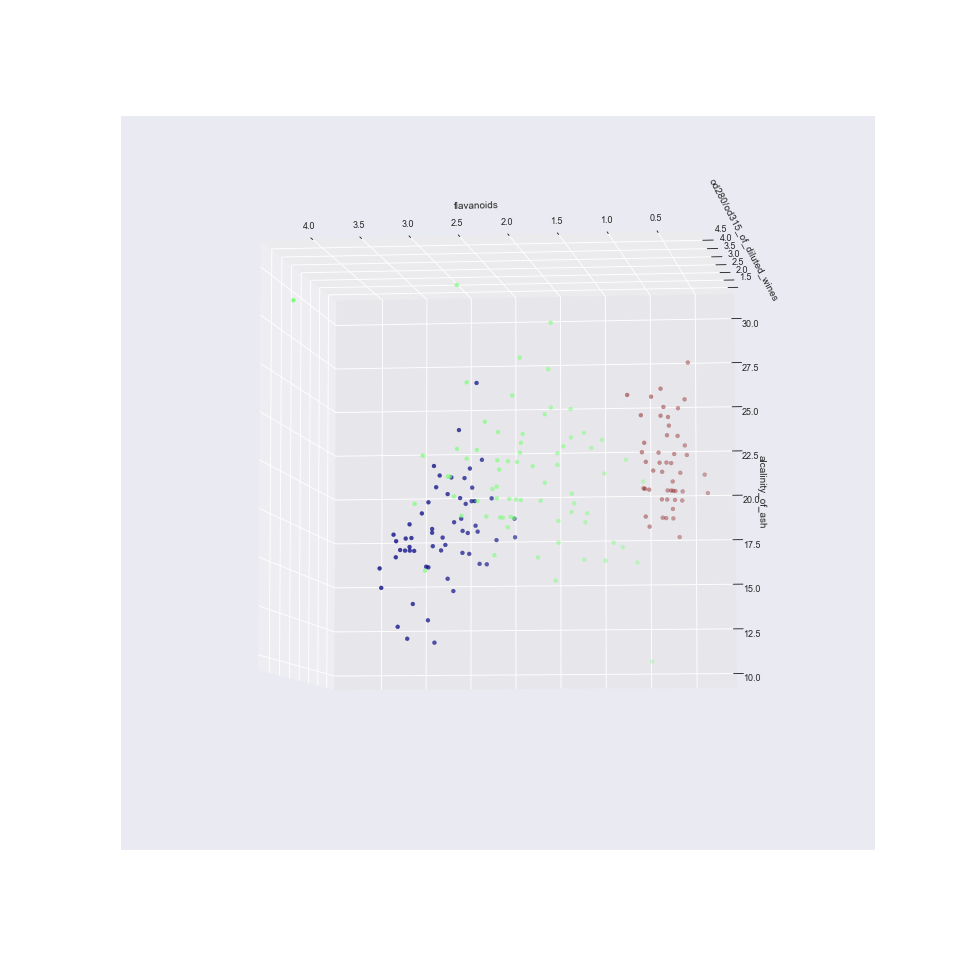

In [365]:
Reduced_data = U.dot(Reduced_S.dot(e_vector.T))
# created_range = range(data_min_value,data_max_value,50)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Reduced_data[:,0], Reduced_data[:,1], Reduced_data[:,2], c=data_color,cmap='jet')
ax.set_xlabel('flavanoids')
ax.set_ylabel('od280/od315_of_diluted_wines')
ax.set_zlabel('alcalinity_of_ash')
plt.grid()
plt.show()

In [366]:
Reduced_S = S.copy()
Reduced_S[1,1] = 0
Reduced_S[2,2] = 0
print(U.shape)
print(Reduced_S.shape)
print(e_vector.T.shape)

(178, 3)
(3, 3)
(3, 3)


In [367]:
# Are they different from one another? 
print(np.around(U.dot(Reduced_S.dot(e_vector.T))-data_main,1).sum())

-31.900000000000006


<IPython.core.display.Javascript object>


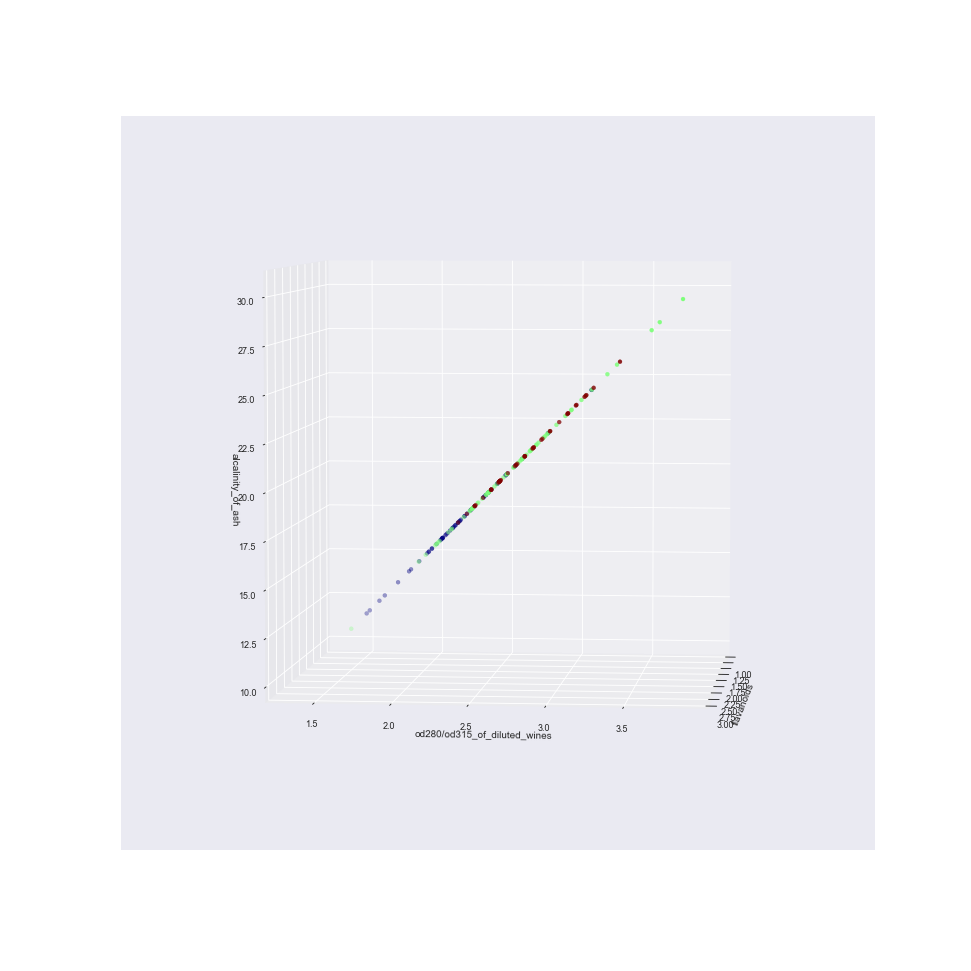

In [368]:
Reduced_data = U.dot(Reduced_S.dot(e_vector.T))
# created_range = range(data_min_value,data_max_value,50)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Reduced_data[:,0], Reduced_data[:,1], Reduced_data[:,2], c=data_color,cmap='jet')
ax.set_xlabel('flavanoids')
ax.set_ylabel('od280/od315_of_diluted_wines')
ax.set_zlabel('alcalinity_of_ash')
plt.grid()
plt.show()